# Graded Project
Working with data using Python Libraries, Visualization, EDA & Data Preprocessing.

In [ ]:
## Context:
A new football club named ‘GL United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potential players.

### Load and explore data 

In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
pd.set_option("display.width",18208)
pd.set_option("display.max_columns",None)

In [5]:
df = pd.read_csv('C:/Users/ANUbrr/Documents/DrSVRajashekararadhya project 1_Python for DS/fifa.csv')
print(df.shape,'\n\n')
# print(df.info(),'\n\n')
df.head()

(18207, 60) 




,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Dropping irrelevant columns

In [6]:
tot_rows, tot_cols = df.shape
print(tot_rows, tot_cols)

18207 60


In [7]:
df_dropped = df.drop(columns=['Photo','Flag','Club Logo','Jersey Number'])
print(len(df_dropped.columns))

56


In [8]:
# some helper functions and variables
# these are just to avoid few repetative code

def analyze_col(df, col_name,head=10):
    null_values = np.sum(df[col_name].isnull(),axis=0)
    print(df[col_name].info());print();
    print(df[col_name].head(head));print();
    for i,value in enumerate(null_values,1):
        print("Null values of column {} is {}, that is {:.2f}% of total datapoints/rows".format(i,value, value / tot_rows * 100));print();

In [9]:
# total null columns
nulls = np.sum(df_dropped.isnull(),axis=0)[lambda x: x > 0]
nulls.sort_values(ascending=False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
Work Rate                      48
Penalties                      48
Jumping                        48
Stamina                        48
Strength                       48
LongShots                      48
Aggression                     48
Interceptions                  48
Positioning                    48
Vision                         48
Composure                      48
Balance                        48
Marking                        48
StandingTackle                 48
SlidingTackle                  48
GKDiving                       48
GKHandling                     48
GKKicking                      48
GKPositioning                  48
GKReflexes                     48
ShotPower                      48
Reactions                      48
Body Type                      48
Agility       

In [10]:
analyze_col(df,['Loaned From'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loaned From  1264 non-null   object
dtypes: object(1)
memory usage: 142.4+ KB
None

  Loaned From
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN

Null values of column 1 is 16943, that is 93.06% of total datapoints/rows



In [11]:
# Use df_drop1 for next
df_drop1 = df_dropped.drop(columns='Loaned From')
print(df_drop1.shape)

(18207, 55)


In [12]:
analyze_col(df_drop1,['Release Clause'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Release Clause  16643 non-null  object
dtypes: object(1)
memory usage: 142.4+ KB
None

  Release Clause
0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
5        €172.1M
6        €137.4M
7          €164M
8        €104.6M
9        €144.5M

Null values of column 1 is 1564, that is 8.59% of total datapoints/rows



### Data Cleaning and Preprocessing

In [ ]:
# remove_dict = dict.fromkeys(['€','M','K'],"")
# remove_dict

In [14]:
def clean_release(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        m = 10 ** 6
        x = x.replace('M','')
        x = str(float(x) * m)
    if "K" in x:
        k = 10 ** 3
        x = x.replace('K','')
        x = str(float(x)*k)
    return x
    
# print(df_drop1['Release Clause'].tail(20))
df_drop1['Release Clause'] = df_drop1['Release Clause'].apply(clean_release)
df_drop1['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: object

#### joined

In [15]:
analyze_col(df=df_drop1,col_name=['Joined'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Joined  16654 non-null  object
dtypes: object(1)
memory usage: 142.4+ KB
None

         Joined
0   Jul 1, 2004
1  Jul 10, 2018
2   Aug 3, 2017
3   Jul 1, 2011
4  Aug 30, 2015
5   Jul 1, 2012
6   Aug 1, 2012
7  Jul 11, 2014
8   Aug 1, 2005
9  Jul 16, 2014

Null values of column 1 is 1553, that is 8.53% of total datapoints/rows



In [16]:
df_drop1.dropna(subset=['Joined'],inplace=True)

In [17]:
df_drop1['Joined'] = df_drop1['Joined'].apply(lambda x: str(x)[-4:])

#### Contract Valid Until

In [19]:
analyze_col(df_drop1,['Contract Valid Until'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Contract Valid Until  16654 non-null  object
dtypes: object(1)
memory usage: 260.2+ KB
None

  Contract Valid Until
0                 2021
1                 2022
2                 2022
3                 2020
4                 2023
5                 2020
6                 2020
7                 2021
8                 2020
9                 2021

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



In [20]:
import datetime as dt

df_drop1['Contract Valid Until'] = df_drop1['Contract Valid Until'].apply(lambda x: dt.datetime.strptime(x,'%Y')).dt.year

#### Height

In [21]:
analyze_col(df_drop1,['Height'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  16654 non-null  object
dtypes: object(1)
memory usage: 260.2+ KB
None

  Height
0    5'7
1    6'2
2    5'9
3    6'4
4   5'11
5    5'8
6    5'8
7    6'0
8    6'0
9    6'2

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



In [22]:
from functools import reduce
from operator import add

"""
input should be in ft'inch format
"""
def convert_to_ft(inp):
    ft = list(map(int,inp.split("'")))
    ft[1] /= 12
    
    return reduce(add,ft)

In [23]:
df_drop1['Height'] = df_drop1['Height'].map(lambda x : round(convert_to_ft(x),2))

In [24]:
print(df_drop1['Height'])

0        5.58
1        6.17
2        5.75
3        6.33
4        5.92
         ... 
18202    5.75
18203    6.25
18204    5.67
18205    5.83
18206    5.83
Name: Height, Length: 16654, dtype: float64


#### Weight

In [25]:
analyze_col(df_drop1,['Weight'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  16654 non-null  object
dtypes: object(1)
memory usage: 260.2+ KB
None

   Weight
0  159lbs
1  183lbs
2  150lbs
3  168lbs
4  154lbs
5  163lbs
6  146lbs
7  190lbs
8  181lbs
9  192lbs

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



In [26]:
# checking if evrywhere the last three letters are 'lbs' everywhere
pd.unique(df_drop1['Weight'].map(lambda x: x[-3:]))

array(['lbs'], dtype=object)

#### missing values

In [27]:
col_list = ['Club','Position','GKDiving','GKHandling','Dribbling','Volleys','ShortPassing','HeadingAccuracy']

In [28]:
analyze_col(df_drop1,col_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Club             16654 non-null  object 
 1   Position         16654 non-null  object 
 2   GKDiving         16654 non-null  float64
 3   GKHandling       16654 non-null  float64
 4   Dribbling        16654 non-null  float64
 5   Volleys          16654 non-null  float64
 6   ShortPassing     16654 non-null  float64
 7   HeadingAccuracy  16654 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.1+ MB
None

                  Club Position  GKDiving  GKHandling  Dribbling  Volleys  ShortPassing  HeadingAccuracy
0         FC Barcelona       RF       6.0        11.0       97.0     86.0          90.0             70.0
1             Juventus       ST       7.0        11.0       88.0     87.0          81.0             89.0
2  Paris Saint-Germain       LW       9.0         9.0      

In [29]:
s = list("testing")
d = s[::]
# d = s.copy()
d[0] = 'd'
print(s)

['t', 'e', 's', 't', 'i', 'n', 'g']


In [30]:
# saving the cleaned data frome to a new variable 
# we will use this data frame for further analysis
dfa = df_drop1
dfa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004,2021,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,2018,2022,6.17,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,2017,2022,5.75,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015,2023,5.92,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Exploratory Data Analysis

#### Plot the distribution of Overall rating for all the players

C:\Users\ANUbrr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


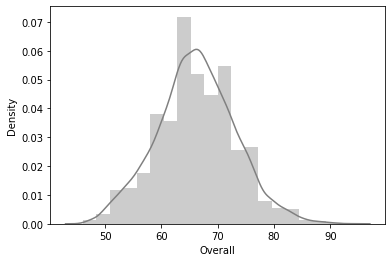

In [34]:
sns.distplot(a=dfa['Overall'],bins=20,kde=True,color="grey")
plt.show()

#### Retrieve the names of top20 players based on the Overall rating.

In [39]:
top_20 = dfa.sort_values(by='Overall',ascending=False).head(20)
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004,2021,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,2018,2022,6.17,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,2017,2022,5.75,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015,2023,5.92,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,2012,2020,5.67,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,4.0,4.0,4.0,High/ High,Lean,RCM,2012,2020,5.67,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,5.0,4.0,3.0,High/ Medium,Normal,RS,2014,2021,6.00,190lbs,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,2005,2020,6.00,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,€44M,€125K,Right,3.0,3.0,2.0,Medium/ High,Lean,CB,2010,2019,6.17,172lbs,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


#### Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [44]:
top_20 = dfa.sort_values(by='Overall',ascending=False).head(20)
top_20
dfa = df_drop1
dfa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004,2021,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,2018,2022,6.17,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,2017,2022,5.75,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015,2023,5.92,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


#### What is the average "Age" and "Wage" of these top 20 players?

In [ ]:
top_20['Wage'] = top_20['Wage']
top_20['Wage'].mean()

In [57]:
# Average age of all the players
age = dfa['Age']
int(age.mean()), age.median() 

(25, 25.0)

#### which player has the highest wage

In [69]:
top_1 = dfa.sort_values(by='Overall',ascending=False).head(1)
top_1

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004,2021,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0


#### Generate a dataframe which should include the "Player name", "ClubName", "Wage", and 'Overall rating'.
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

In [101]:
top_5 = dfa.groupby(by='Position')['Position','Name','Club','Wage','Overall'].head(5)
top_5.sort_values(['Position','Overall'],ascending=[True,False])


C:\Users\ANUbrr\AppData\Local\Temp/ipykernel_6548/1467314645.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_5 = dfa.groupby(by='Position')['Position','Name','Club','Wage','Overall'].head(5)


,Position,Name,Club,Wage,Overall
17,CAM,A. Griezmann,Atlético Madrid,€145K,89
31,CAM,C. Eriksen,Tottenham Hotspur,€205K,88
61,CAM,Roberto Firmino,Liverpool,€195K,86
66,CAM,T. Müller,FC Bayern München,€135K,86
74,CAM,M. Özil,Arsenal,€190K,86
...,...,...,...,...,...
1,ST,Cristiano Ronaldo,Juventus,€405K,94
10,ST,R. Lewandowski,FC Bayern München,€205K,90
16,ST,H. Kane,Tottenham Hotspur,€205K,89
23,ST,S. Agüero,Manchester City,€300K,89


In [102]:
top_5 = dfa.groupby(by='Position')['Position','Club','Overall'].head(5)
top_5.sort_values(['Position','Overall'],ascending=[True,False])

C:\Users\ANUbrr\AppData\Local\Temp/ipykernel_6548/2435198350.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_5 = dfa.groupby(by='Position')['Position','Club','Overall'].head(5)


,Position,Club,Overall
17,CAM,Atlético Madrid,89
31,CAM,Tottenham Hotspur,88
61,CAM,Liverpool,86
66,CAM,FC Bayern München,86
74,CAM,Arsenal,86
...,...,...,...
1,ST,Juventus,94
10,ST,FC Bayern München,90
16,ST,Tottenham Hotspur,89
23,ST,Manchester City,89


In [106]:
top_10=columns = ["Overall", "Height", "Weight", "Release Clause"]

In [109]:
top_10=dfa.loc[:,columns].dtypes


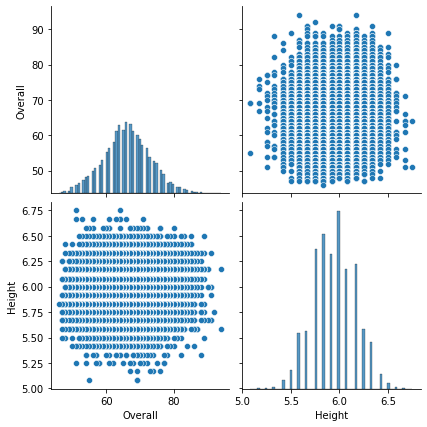

In [110]:
top_10=sns.pairplot(data=dfa.loc[:,columns[:2]],height=3)

plt.show()

#### What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. 

In [117]:
dfa['Age'] = dfa['Age'].astype('float')
dfa = dfa.sort_values(by='Potential')
top_5 = dfa.groupby('Potential')
top_5.mean()['Age']


Potential
48    38.500000
50    29.000000
51    27.500000
52    30.200000
53    34.166667
54    31.000000
55    27.944444
56    27.956522
57    28.000000
58    26.376471
59    27.033898
60    26.639752
61    26.543210
62    26.878963
63    27.281573
64    26.538462
65    26.286107
66    26.412565
67    26.242229
68    25.797373
69    25.594620
70    25.461746
71    25.561905
72    25.153620
73    25.006342
74    24.449777
75    24.382212
76    24.085586
77    24.078303
78    23.236170
79    23.108747
80    23.602500
81    23.108209
82    23.625571
83    23.142857
84    22.818182
85    23.191667
86    22.789474
87    23.389831
88    23.444444
89    23.387097
90    25.000000
91    26.000000
92    22.555556
93    24.250000
94    29.333333
95    19.000000
Name: Age, dtype: float64

In [120]:
top_5=columns = ["Age", "Potential"]

In [121]:
top_5=dfa.loc[:,columns].dtypes

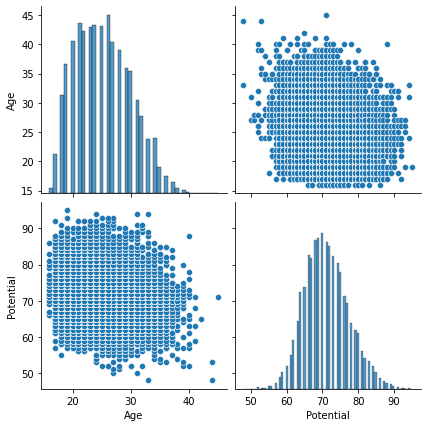

In [123]:
top_5=sns.pairplot(data=dfa.loc[:,columns[:2]],height=3)

plt.show()

#### Which features directly contribute to the wages of the players?Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

In [130]:
top_20 = dfa.groupby(by='Potential')['Potential','Overall','Value','International Reputation','Release Clause'].head(20)
top_20.sort_values(['Potential','Overall'],ascending=[True,False])

C:\Users\ANUbrr\AppData\Local\Temp/ipykernel_6548/4212265807.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_20 = dfa.groupby(by='Potential')['Potential','Overall','Value','International Reputation','Release Clause'].head(20)


,Potential,Overall,Value,International Reputation,Release Clause
18171,48,48,€20K,1.0,25000.0
18183,48,48,€0,1.0,nan
18043,50,50,€20K,1.0,25000.0
18025,50,50,€20K,1.0,27000.0
17988,51,51,€40K,1.0,86000.0
...,...,...,...,...,...
229,93,82,€29M,3.0,55100000.0
0,94,94,€110.5M,5.0,226500000.0
1,94,94,€77M,5.0,127100000.0
15,94,89,€89M,3.0,153500000.0


In [ ]:
top_5=columns = ["Wage", "Potential"]

In [131]:
top_5=dfa.loc[:,columns].dtypes

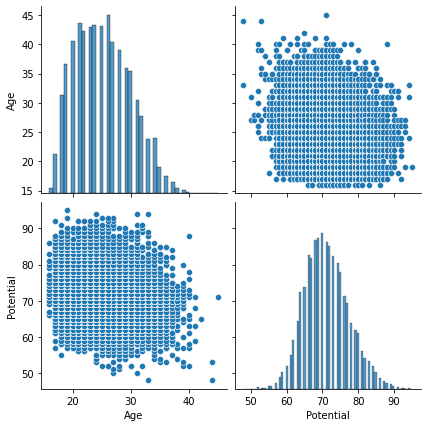

In [132]:
top_5=sns.pairplot(data=dfa.loc[:,columns[:2]],height=3)
plt.show()

In [2]:
dfa['Wage'] = dfa['Wage'].astype('float')
dfa = dfa.sort_values(by='Overall')
top_5 = dfa.groupby('Position')
top_5.mean()['Wage']

NameError: name 'dfa' is not defined